In [1]:
import eda_plots as ep
import pandas as pd

In [2]:
df = pd.read_csv("../input/train.csv")
df["count"]=1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [3]:
X_test = pd.read_csv("../input/test.csv")
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
count            int64
dtype: object

In [5]:
df["Pclass"] = df["Pclass"].astype(str)
X_test["Pclass"] = X_test["Pclass"].astype(str)
df.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
count            int64
dtype: object

In [6]:
bins = [-1,0.5,100]
labels = ["0", "1+"]
df["SibSp_grp"] = pd.cut(df["SibSp"], bins, labels = labels)
X_test["SibSp_grp"] = pd.cut(X_test["SibSp"], bins, labels = labels)

In [7]:
bins = [-1,0.5,100]
labels = ["0", "1+"]
df["Parch_grp"] = pd.cut(df["Parch"], bins, labels = labels)
X_test["Parch_grp"] = pd.cut(X_test["Parch"], bins, labels = labels)

d:\Data_Science_Study\kaggle\kaggle_titanic\ML\eda_plots.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  feature_df = pd.pivot_table(df, values='count', index=feature, columns='Survived',aggfunc='count').sort_index()


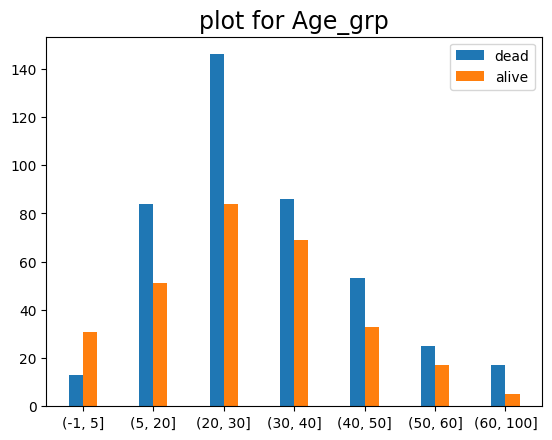

In [8]:
bins = [-1,5,20,30,40,50,60,100]
df["Age_grp"] = pd.cut(df["Age"], bins)
X_test["Age_grp"] = pd.cut(X_test["Age"], bins)
ep.bar_plot_for_categorical_feature(df,"Age_grp")

In [9]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass           object
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
count             int64
SibSp_grp      category
Parch_grp      category
Age_grp        category
dtype: object

In [10]:
df["Pclass"]=df["Pclass"].astype('category')
df["Sex"]=df["Sex"].astype('category')
df["Embarked"]=df["Embarked"].astype('category')

X_test["Pclass"]=X_test["Pclass"].astype('category')
X_test["Sex"]=X_test["Sex"].astype('category')
X_test["Embarked"]=X_test["Embarked"].astype('category')

df.dtypes


PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
count             int64
SibSp_grp      category
Parch_grp      category
Age_grp        category
dtype: object

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

In [12]:
feature_list = ["Pclass","Sex","Embarked","SibSp_grp","Parch_grp","Age_grp"]
X = df[["PassengerId","Pclass","Sex","Embarked","SibSp_grp","Parch_grp","Age_grp"]]
y = df["Survived"]

In [13]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [14]:
def xgboost_bayes_opt(learning_rate,n_estimators,max_depth,subsample,colsample,gamma):
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
    clf = XGBClassifier(
        learning_rate = learning_rate,
        n_estimators = n_estimators,
        max_depth = max_depth,
        subsample = subsample,
        colsample = colsample,
        gamma = gamma,
        eval_metric='aucpr',
        random_state = 42,
        enable_categorical=True,
    )
    return np.mean(cross_val_score(clf, X[feature_list], y, cv=5, scoring='average_precision'))

In [15]:
pbounds = {
    'learning_rate': (0.01, 1.0),
    'n_estimators': (100, 1000),
    'max_depth': (3,10),
    'subsample': (1.0, 1.0),  # Change for big datasets
    'colsample': (1.0, 1.0),  # Change for datasets with lots of features
    'gamma': (0, 5)}

optimizer = BayesianOptimization(
    f = xgboost_bayes_opt,
    pbounds = pbounds,
    random_state = 42
)

In [16]:
optimizer.maximize(init_points=20, n_iter=4)

|   iter    |  target   | colsample |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 1         | 0.8043    | 1.0       | 4.754     | 0.7347    | 7.191     | 240.4     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 2         | 0.7986    | 1.0       | 4.331     | 0.6051    | 7.957     | 118.5     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 3         | 0.8331    | 1.0       | 1.062     | 0.19      | 4.284     | 373.8     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 4         | 0.8149    | 1.0       | 1.456     | 0.6157    | 3.976     | 362.9     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 5         | 0.809     | 1.0       | 3.926     | 0.2077    | 6.6       | 633.2     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 6         | 0.8343    | 1.0       | 0.8526    | 0.0744    | 9.642     | 969.1     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 7         | 0.8259    | 1.0       | 0.4884    | 0.6874    | 6.081     | 209.8     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 8         | 0.8092    | 1.0       | 4.547     | 0.2662    | 7.638     | 380.5     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 9         | 0.8265    | 1.0       | 0.9243    | 0.9699    | 8.426     | 945.5     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 10        | 0.8085    | 1.0       | 4.609     | 0.09761   | 4.372     | 140.7     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 11        | 0.8255    | 1.0       | 1.357     | 0.8305    | 5.497     | 352.8     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 12        | 0.8109    | 1.0       | 4.011     | 0.08381   | 9.908     | 795.0     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 13        | 0.8094    | 1.0       | 4.077     | 0.7098    | 8.103     | 794.1     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 14        | 0.8197    | 1.0       | 0.5793    | 0.8645    | 7.363     | 397.8     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 15        | 0.8185    | 1.0       | 1.626     | 0.7323    | 7.463     | 898.5     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 16        | 0.8131    | 1.0       | 3.566     | 0.7632    | 6.929     | 793.9     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 17        | 0.8198    | 1.0       | 2.138     | 0.03516   | 3.755     | 128.3     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 18        | 0.82      | 1.0       | 2.543     | 0.9085    | 4.745     | 469.3     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 19        | 0.8321    | 1.0       | 0.3849    | 0.2969    | 4.129     | 936.7     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 20        | 0.8001    | 1.0       | 4.357     | 0.8056    | 4.306     | 903.3     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 21        | 0.8269    | 1.0       | 0.5986    | 0.5655    | 5.929     | 940.4     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 22        | 0.8343    | 1.0       | 0.9402    | 0.082     | 7.283     | 965.9     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 23        | 0.795     | 1.0       | 4.812     | 0.9969    | 10.0      | 966.5     | 1.0       |


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarn

| 24        | 0.829     | 1.0       | 0.0       | 0.01      | 7.1       | 968.5     | 1.0       |


In [17]:
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

Best result: {'colsample': np.float64(1.0), 'gamma': np.float64(0.8526206184364576), 'learning_rate': np.float64(0.07440107705542671), 'max_depth': np.float64(9.642198760773333), 'n_estimators': np.float64(969.0688297671035), 'subsample': np.float64(1.0)}; f(x) = 0.8343359059454034.


In [18]:
best_param = optimizer.max["params"]
best_param["max_depth"] = int(best_param["max_depth"])
best_param["n_estimators"] = int(best_param["n_estimators"])
best_param

{'colsample': np.float64(1.0),
 'gamma': np.float64(0.8526206184364576),
 'learning_rate': np.float64(0.07440107705542671),
 'max_depth': 9,
 'n_estimators': 969,
 'subsample': np.float64(1.0)}

In [19]:
model = XGBClassifier(enable_categorical=True, **best_param)
model.fit(X[feature_list],y)
# model.predict_proba(X_test[feature_list])


d:\Data_Science_Study\kaggle\kaggle_titanic_venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample=np.float64(1.0), colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None,
              gamma=np.float64(0.8526206184364576), grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.07440107705542671), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=969, n_jobs=None,
              num_parallel_tree=None, ...)

In [20]:
model.predict(X_test[feature_list])

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [21]:
res_tb = X_test[["PassengerId"]]
res_tb["Survived"] = model.predict(X_test[feature_list])
res_tb

C:\Users\sungh\AppData\Local\Temp\ipykernel_23452\1163922856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_tb["Survived"] = model.predict(X_test[feature_list])


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [23]:
res_tb.to_csv("res.csv",index=False)